In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.special as sci
from scipy.integrate import quad



In [2]:
a_ik = [-0.999985,-0.7369246,0.511210,-0.0826998,0.0655341,-0.562082,-0.905911,0.357729,0.358593,0.869386,-0.232996,0.0388327,0.661931,-0.930856,-0.893077,-0.0594001]





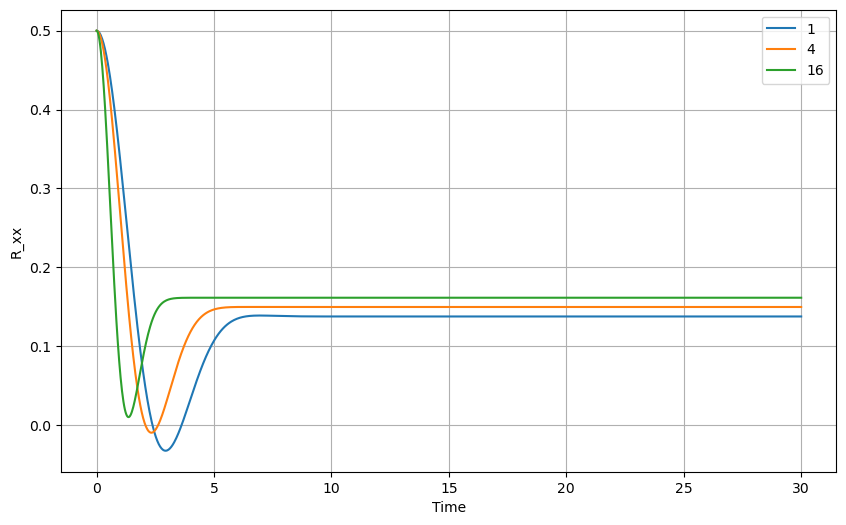

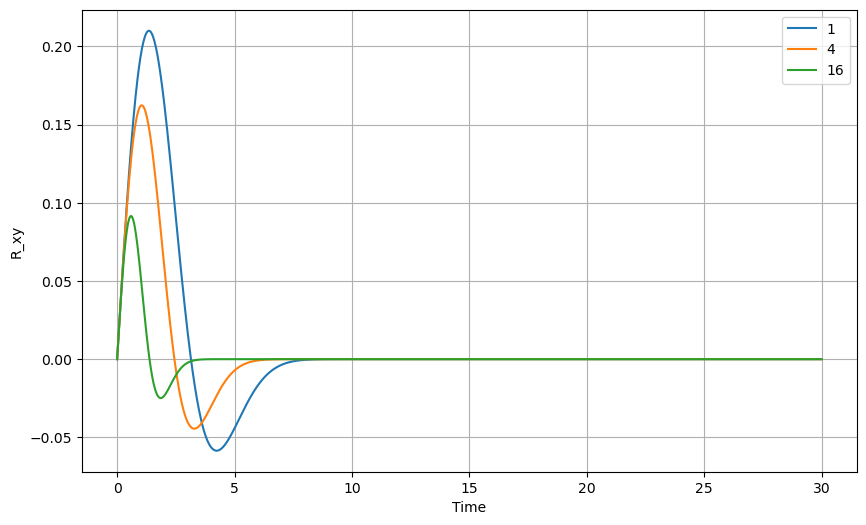

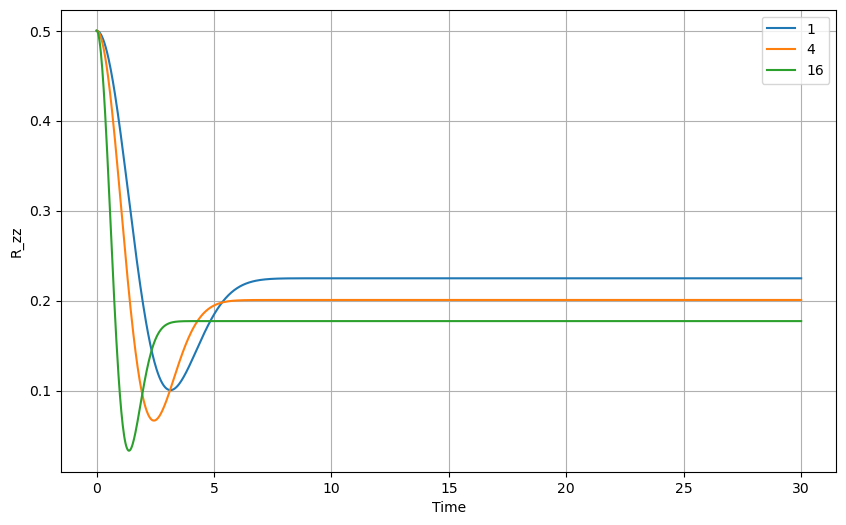

In [3]:
class Schulten_wolynes:


    def __init__(self,applied_magnetic_field_strength,gyromagnetic_ratio,nuclei_number,total_time,time_steps,a_ik):
          self.applied_magnetic_field_strength = applied_magnetic_field_strength
          self.gyromagnetic_ratio = gyromagnetic_ratio
          self.nuclei_number = nuclei_number
          self.total_time = total_time
          self.time_steps = time_steps
          self.a_ik = a_ik


    def calculate_electron_tensor(self,tensor): 
         electron_spin_correlation_tensor = []
         t_star_array = []
         func_w_star_t_star_array = []
         tau = self.__calculate_tau__()
         w_star = self.__calculate_w_star__(tau)
         time_increment = self.total_time / self.time_steps
         
         for i in range(self.time_steps):
              
                current_time = i * time_increment
                t_star = current_time / tau
                func_w_star_t_star = self.__calculate_func_numerically__(t_star,w_star)
              
                tensor_function = getattr(self, tensor)
            
                t_star_array.append(t_star)
                func_w_star_t_star_array.append(func_w_star_t_star)
                electron_spin_correlation_tensor.append(tensor_function(w_star, t_star, func_w_star_t_star))
         
         
         
         return np.real(electron_spin_correlation_tensor)
        
    
    def __integrand__(self,s, w):
        return np.exp(-s**2) * np.sin(w * s)
         
    def __calculate_func_numerically__(self,t_star,w_star):
         func_w_star_t_star_value, error = quad(self.__integrand__, 0 ,t_star, args=(w_star))
         return func_w_star_t_star_value 


    def __calculate_tau__(self):
        a_ik_square = np.square(self.a_ik[0:self.nuclei_number]) # squaring array elements
        sum_a_ik_square = np.sum(a_ik_square) # summing up to nuclei number array elements
        nuclear_constant = 0.5*(0.5 + 1)
        tau_squared = 6 / (sum_a_ik_square*nuclear_constant)
        tau = np.sqrt(tau_squared)
        return  tau


    def __calculate_w_star__(self,tau):
        w_i = -self.gyromagnetic_ratio*self.applied_magnetic_field_strength # Looking at w_i as norm calculation
        w_star = w_i * tau
        return  abs(w_star)
              
    def __R_xx__(self, w_star, t_star, func_w_star_t_star):
        exp_term = np.exp(-t_star ** 2)
        cos_term = np.cos(w_star * t_star)
        sin_term = np.sin(w_star * t_star)
        return (w_star * (2 + np.exp(-t_star**2) * ((w_star**2 - 2) * np.cos(w_star * t_star) - 2 * w_star * t_star * np.sin(w_star * t_star))) - 4 * func_w_star_t_star) / (2 * w_star**3)
        

    def __R_xy__(self,w_star,t_star, func_w_star_t_star):
        exp_term = np.exp(-t_star**2)
        cos_term = np.cos(w_star * t_star)
        sin_term = np.sin(w_star * t_star)
        return exp_term*(2*w_star*t_star*cos_term + (w_star**2 -2)*sin_term) / (2* w_star**2)


    def __R_zz__(self, w_star, t_star, func_w_star_t_star):
        exp_term = np.exp(-t_star ** 2)
        cos_term = np.cos(w_star * t_star)
        sin_term = np.sin(w_star * t_star)
        return (w_star * ((w_star** 2 ) + (4 * exp_term * cos_term) -4) + ( 8 * func_w_star_t_star)) / (2 * (w_star ** 3))
    
       



    



test = Schulten_wolynes(0.5,-1.001,1,30,1000,a_ik)

R_xx_1 = test.calculate_electron_tensor('__R_xx__')
R_xy_1 = test.calculate_electron_tensor('__R_xy__')
R_zz_1 = test.calculate_electron_tensor('__R_zz__')

test = Schulten_wolynes(0.5,-1.001,4,30,1000,a_ik)

R_xx_4 = test.calculate_electron_tensor('__R_xx__')
R_xy_4 = test.calculate_electron_tensor('__R_xy__')
R_zz_4 = test.calculate_electron_tensor('__R_zz__')

test = Schulten_wolynes(0.5,-1.001,16,30,1000,a_ik)

R_xx_16 = test.calculate_electron_tensor('__R_xx__')
R_xy_16 = test.calculate_electron_tensor('__R_xy__')
R_zz_16 = test.calculate_electron_tensor('__R_zz__')


time_points = np.linspace(0, 30, 1000)


plt.figure(figsize=(10, 6))
plt.plot(time_points, R_xx_1, label='1')
plt.plot(time_points, R_xx_4, label='4')
plt.plot(time_points, R_xx_16, label='16')
plt.xlabel('Time')
plt.ylabel('R_xx')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_points, R_xy_1, label='1')
plt.plot(time_points, R_xy_4, label='4')
plt.plot(time_points, R_xy_16, label='16')
plt.xlabel('Time')
plt.ylabel('R_xy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_points, R_zz_1, label='1')
plt.plot(time_points, R_zz_4, label='4')
plt.plot(time_points, R_zz_16, label='16')
plt.xlabel('Time')
plt.ylabel('R_zz')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
class Improved_semiclassical:


    def __init__(self,):

In [6]:
def evolve_spin(S, omega, dt):
    omega_mag = np.linalg.norm(omega)
    if omega_mag == 0:
        return S
    omega_hat = omega / omega_mag
    S_cos = S * np.cos(omega_mag * dt)
    S_cross = np.cross(S, omega_hat) * np.sin(omega_mag * dt)
    S_dot = np.dot(omega_hat, S) * (1 - np.cos(omega_mag * dt)) * omega_hat
    return S_cos + S_cross + S_dot

def integrate_coupled_equations(S, I, omega_i, a_ik, delta_t):
    N_i = len(I)
    
    # Step 1: Evolve S_i(t) for delta_t / 2
    omega_S = omega_i + np.sum(a_ik[:, np.newaxis] * I, axis=0)
    S = evolve_spin(S, omega_S, delta_t / 2)
    
    # Step 2: Evolve I_ik(t) for delta_t
    for k in range(N_i):
        omega_I = a_ik[k] * S
        I[k] = evolve_spin(I[k], omega_I, delta_t)
    
    # Step 3: Evolve S_i(t) for delta_t / 2
    omega_S = omega_i + np.sum(a_ik[:, np.newaxis] * I, axis=0)
    S = evolve_spin(S, omega_S, delta_t / 2)
    
    return S, I

# Example usage:
S_i = np.array([1.0, 0.0, 0.0])  # Initial electron spin vector
I_ik = np.array([[0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])  # Initial nuclear spin vectors
omega_i = np.array([0.0, 0.0, -1.001])  # Electron spin precession frequency
a_ik = np.array([0.5, 0.7])  # Hyperfine coupling constants
delta_t = 0.01  # Time step

S_i, I_ik = integrate_coupled_equations(S_i, I_ik, omega_i, a_ik, delta_t)
print("Updated S_i:", S_i)
print("Updated I_ik:", I_ik)

Updated S_i: [0.99998281 0.00302257 0.00502444]
Updated I_ik: [[ 1.25187425e-05  9.99987500e-01 -4.99995783e-03]
 [-1.04736496e-05  6.99991312e-03  9.99975500e-01]]
